## Anisotropic AVO

Trying to reproduce some figures in Blangy, JP, 1994, AVO in tranversely isotropic media—An overview. *Geophysics* **59** (5), 775–781. This notebook goes with [a blog post on Agile Geoscience](http://www.agilegeoscience.com/journal/2014/8/6/the-blangy-equation.html).

The key equation is:

$$A = \frac12 \left[ \frac{\Delta\rho}{\rho} + \frac{\Delta V_\textrm{P}}{V_\textrm{P}} \right]$$

$$B = 2 \frac{V_\textrm{S}^2}{V_\textrm{P}^2} \times \left[ \frac{\Delta\rho}{\rho} + 2 \frac{\Delta V_\textrm{S}}{V_\textrm{S}} \right] \sin^2\! \theta$$

$$C = \frac12 \left( \frac{\Delta V_\textrm{P}}{V_\textrm{P}} \right) \tan^2\!\theta$$

$$D = \frac12 \Delta\delta \sin^2\!\theta$$

$$E = \frac12 (\Delta \delta - \Delta \epsilon ) \sin^2\!\theta \, \tan^2\!\theta$$

$$A_\textrm{RP} = A - B + C + D - E$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Test data from Table 1
type1 = {'shale':      {'vp':3300., 'vs':1700., 'rho':2350., 'd':0.15, 'e':0.30}, 
         'sand_gas':   {'vp':4200., 'vs':2700., 'rho':2350., 'd':0.00, 'e':0.00},
         'sand_water': {'vp':4200., 'vs':2100., 'rho':2450., 'd':0.00, 'e':0.00},
         }
type2 = {'shale':      {'vp':2896., 'vs':1402., 'rho':2250., 'd':0.15, 'e':0.30},
         'sand_gas':   {'vp':3322., 'vs':2215., 'rho':2000., 'd':0.00, 'e':0.00},
         'sand_water': {'vp':3322., 'vs':1402., 'rho':2250., 'd':0.00, 'e':0.00},
         }
type3 = {'shale':      {'vp':2307., 'vs':1108., 'rho':2150., 'd':0.15, 'e':0.30}, 
         'sand_gas':   {'vp':1951., 'vs':1301., 'rho':1950., 'd':0.00, 'e':0.00},
         'sand_water': {'vp':1951., 'vs': 930., 'rho':2200., 'd':0.00, 'e':0.00},
         }

In [3]:
print type2['sand_gas']['d'] - type2['shale']['d'] # delta-delta
print type2['sand_gas']['e'] - type2['shale']['e'] # delta-epsilon

-0.15
-0.3


In [4]:
def blangy(interface, case='gas', i=0):
    
    upper = interface['shale']
    lower = interface['sand_'+case]
    
    inc_angle = np.radians(i)
    trans_angle = np.arcsin(np.sin(inc_angle) * lower['vp']/upper['vp'])
    theta = 0.5 * (inc_angle + trans_angle)
    
    vp  = (upper['vp'] + lower['vp'])/2.0
    vs  = (upper['vs'] + lower['vs'])/2.0
    rho = (upper['rho'] + lower['rho'])/2.0
    
    dvp = lower['vp'] - upper['vp']
    dvs = lower['vs'] - upper['vs']
    drho = lower['rho'] - upper['rho']
    dd = lower['d'] - upper['d']
    de = lower['e'] - upper['e']
    
    A = 0.5 * (drho/rho + dvp/vp)
    B = 2.0 * (vs**2 / vp**2) * ((drho/rho + 2 * dvs/vs)) * np.sin(theta)**2
    C = 0.5 * (dvp/vp) * np.tan(theta)**2
    D = 0.5 * dd * np.sin(theta)**2
    E = 0.5 * (dd - de) * np.sin(theta)**2 * np.tan(theta)**2
        
    isotropic = A - B + C
    anisotropic = A - B + C + D - E
    
    return isotropic, anisotropic, (A, -B, C, D, -E)

In [5]:
r0 = blangy(type3, case='gas', i=0)
r0[1]

-0.1323878151886263

In [6]:
r10 = blangy(type3, i=10)
r10[1]

-0.1402341169325664

##Reproduce Figure 2

We will try to reproduce Figure 2 from the Blangy paper.

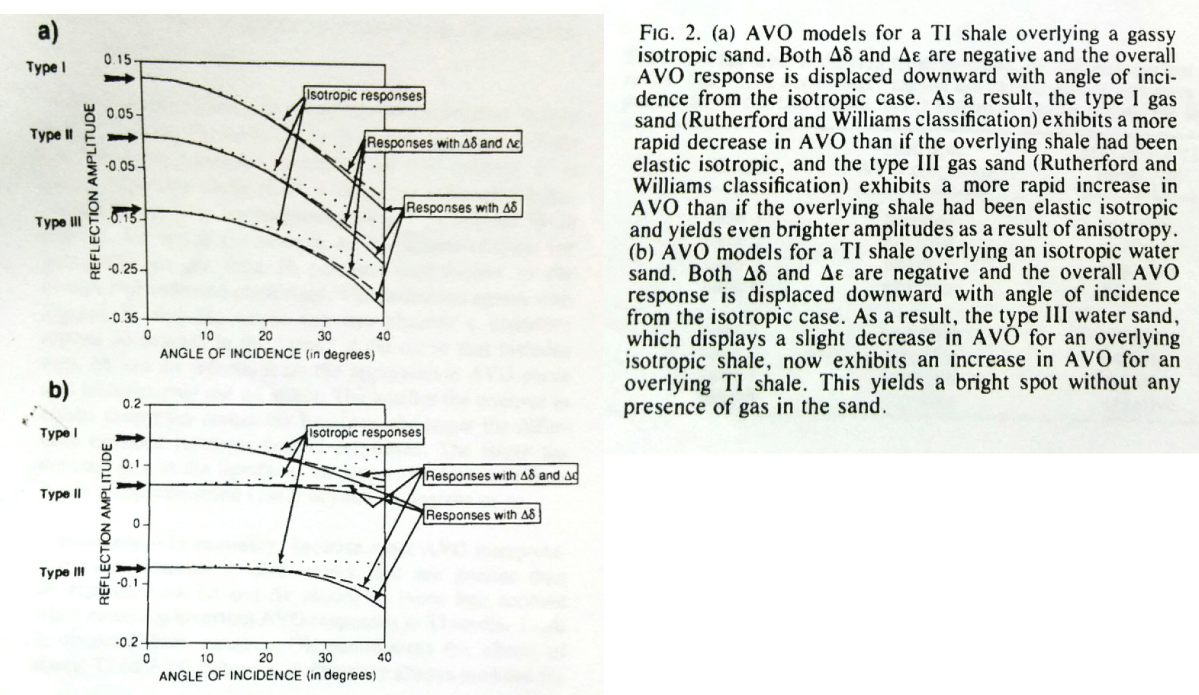

In [7]:
from IPython.display import Image
Image(filename='blangy_fig2_rearrange.png', width=800)

In [8]:
theta = np.linspace(0, 40)

In [9]:
r1 = blangy(type1, i=theta)
r2 = blangy(type2, i=theta)
r3 = blangy(type3, i=theta)

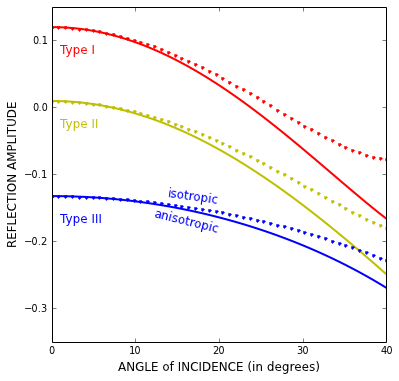

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(theta, r1[0], 'r.')
ax.plot(theta, r1[1], 'r', lw=2)
ax.plot(theta, r2[0], 'y.')
ax.plot(theta, r2[1], 'y', lw=2)
ax.plot(theta, r3[0], 'b.')
ax.plot(theta, r3[1], 'b', lw=2)

ax.set_ylim(-0.35, 0.15)
ax.text(1, r1[0][0]-0.04,'Type I',  color='r', size='12')
ax.text(1, r2[0][0]-0.04,'Type II', color='y', size='12')
ax.text(1, r3[0][0]-0.04,'Type III',color='b', size='12')
ax.text(20, r3[0][20]+0.014,'isotropic',color='b', size='12', ha='right', rotation=-8)
ax.text(20, r3[1][20]-0.01,'anisotropic',color='b', size='12', ha='right', rotation=-14)

plt.xlabel('ANGLE of INCIDENCE (in degrees)', size=12)
plt.ylabel('REFLECTION AMPLITUDE', size=12)
plt.xticks(np.arange(0,50,10))

plt.show()

Now for the water case:

In [11]:
w1 = blangy(type1, case='water', i=theta)
w2 = blangy(type2, case='water', i=theta)
w3 = blangy(type3, case='water', i=theta)

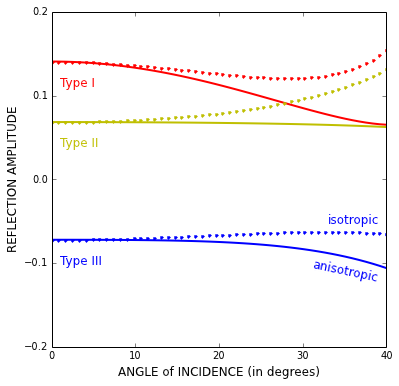

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(theta, w1[0], 'r.')
ax.plot(theta, w1[1], 'r', lw=2)
ax.plot(theta, w2[0], 'y.')
ax.plot(theta, w2[1], 'y', lw=2)
ax.plot(theta, w3[0], 'b.')
ax.plot(theta, w3[1], 'b', lw=2)

ax.set_ylim(-0.2, 0.2)
ax.text(1, w1[0][0]-0.03,'Type I',  color='r', size='12')
ax.text(1, w2[0][0]-0.03,'Type II', color='y', size='12')
ax.text(1, w3[0][0]-0.03,'Type III',color='b', size='12')
ax.text(39, w3[0][-5]+0.01,'isotropic',color='b', size='12', ha='right')
ax.text(39, w3[1][45]-0.01,'anisotropic',color='b', size='12', ha='right', rotation=-12)

plt.xlabel('ANGLE of INCIDENCE (in degrees)', size=12)
plt.ylabel('REFLECTION AMPLITUDE', size=12)
plt.xticks(np.arange(0,50,10))
plt.yticks(np.arange(-0.2,0.3,0.1))

plt.show()

##Components

Let's choose the Type II gas case, and try plotting the parts one by one — sort of like Blangy does with the anisotropic parameters — but starting with the intercept:

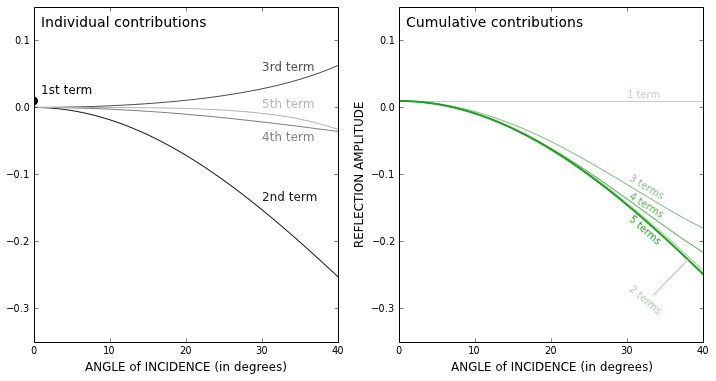

In [13]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.scatter(theta[0], r2[2][0], s=60, c='k')
#ax1.axhline(r2[2][0])
ax1.plot(theta, r2[2][1], '0.1')
ax1.plot(theta, r2[2][2], '0.3')
ax1.plot(theta, r2[2][3], '0.5')
ax1.plot(theta, r2[2][4], '0.7')

ax1.text(1, 0.02,'1st term', size='12', color='k')
ax1.text(30, -0.14,'2nd term', size='12', color='0.1')
ax1.text(30, 0.055,'3rd term', size='12', color='0.3')
ax1.text(30, -0.05,'4th term',size='12', color='0.5')
ax1.text(30, 0.0,'5th term', size='12', color='0.7')

ax1.text(1, 0.12,'Individual contributions', size='14')
plt.xlabel('ANGLE of INCIDENCE (in degrees)', size=12)
plt.xticks(np.arange(0,50,10))

ax2 = fig.add_subplot(122)
ax2.axhline(r2[2][0], c='#c0d0c0')
ax2.plot(theta, r2[2][0]+r2[2][1], '#a0d0a0')
ax2.plot(theta, r2[2][0]+r2[2][1]+r2[2][2], '#80c080')
ax2.plot(theta, r2[2][0]+r2[2][1]+r2[2][2]+r2[2][3], '#60b060')
ax2.plot(theta, r2[2][0]+r2[2][1]+r2[2][2]+r2[2][3]+r2[2][4], '#20a020', lw=2)

ax2.text(30, 0.015, '1 term', color='#c0d0c0')
ax2.plot([33.5, 38.2], [-0.28, -0.225], '-', color='#a0d0a0')
ax2.text(30, -0.275, '2 terms', color='#a0d0a0', rotation='-40')
ax2.text(30, -0.11, '3 terms', color='#80c080', rotation='-31')
ax2.text(30, -0.137, '4 terms', color='#60b060', rotation='-32')
ax2.text(30, -0.17, '5 terms', color='#20a020', rotation='-41')

ax1.set_xlim(0, 40)
ax1.set_ylim(-0.35, 0.15)
ax2.set_ylim(-0.35, 0.15)

ax2.text(1, 0.12,'Cumulative contributions', size='14')
plt.xlabel('ANGLE of INCIDENCE (in degrees)', size=12)
plt.ylabel('REFLECTION AMPLITUDE', size=12)
plt.xticks(np.arange(0,50,10))

plt.show()

Interesting how the 5-term result is almost exactly the same as the 2-term approximation. So anistropy balances the density effect.

Let's plot them as a percentage of the total reflectivity.

In [14]:
r0 = np.repeat(r2[2][0], 50)

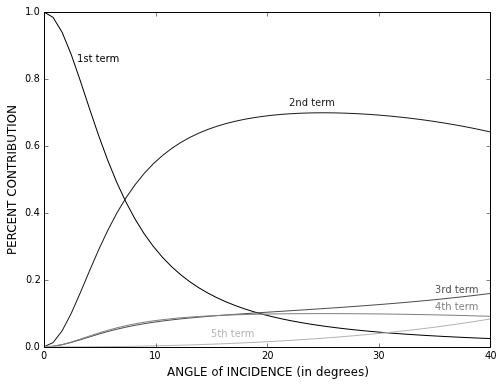

In [15]:
total = np.abs(r0) + np.abs(r2[2][1]) + np.abs(r2[2][2]) + np.abs(r2[2][3]) + np.abs(r2[2][4]) 

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(theta, r0/total, '0.0')
ax1.plot(theta, np.abs(r2[2][1])/total, '0.1')
ax1.plot(theta, np.abs(r2[2][2])/total, '0.3')
ax1.plot(theta, np.abs(r2[2][3])/total, '0.5')
ax1.plot(theta, np.abs(r2[2][4])/total, '0.7')

ax1.text(3, 0.85, '1st term', color='0.0')
ax1.text(22, 0.72, '2nd term', color='0.1')
ax1.text(35, 0.16, '3rd term', color='0.3')
ax1.text(35, 0.11, '4th term', color='0.5')
ax1.text(15, 0.03, '5th term', color='0.7')

plt.xlabel('ANGLE of INCIDENCE (in degrees)', size=12)
plt.ylabel('PERCENT CONTRIBUTION', size=12)
plt.xticks(np.arange(0,50,10))
ax1.set_ylim(0,1)

plt.show()

##Equivalence to Aki-Richards

Let's check that the 2-term Blangy is the same as the Aki-Richards solution we have in the `agilegeo` library — see [the GitHub repo](https://github.com/agile-geoscience/agilegeo)

In [16]:
from agilegeo import avo

In [17]:
vp2 =  type2['sand_gas']['vp']
vs2 =  type2['sand_gas']['vs']
rho2 = type2['sand_gas']['rho']
vp1 =  type2['shale']['vp']
vs1 =  type2['shale']['vs']
rho1 = type2['shale']['rho']

ar = avo.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta)

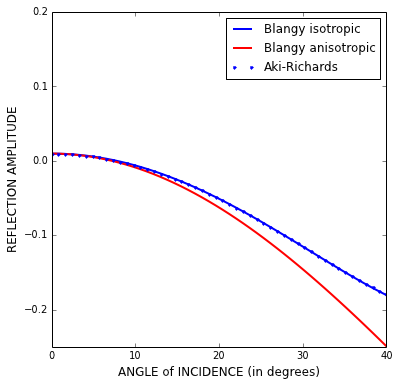

In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(theta, r2[0], 'b', lw=2, label='Blangy isotropic')
ax.plot(theta, r2[1], 'r', lw=2, label='Blangy anisotropic')
ax.plot(theta, ar, '.', label="Aki-Richards")

plt.xlabel('ANGLE of INCIDENCE (in degrees)', size=12)
plt.ylabel('REFLECTION AMPLITUDE', size=12)
plt.xticks(np.arange(0,50,10))
plt.yticks(np.arange(-0.2,0.3,0.1))
plt.legend()

plt.show()

##Anisotropy-only reflection

Can we get a reflection with no change in acoustic impedance? Sure. It'll be the sum of the 4th and 5th terms.

In [19]:
typex = {'shale':      {'vp':2896., 'vs':1402., 'rho':2250., 'd':0.15, 'e':0.30},
         'sand_water': {'vp':2896., 'vs':1402., 'rho':2250., 'd':0.00, 'e':0.00},
         }

In [22]:
rx = blangy(typex, 'water', theta)

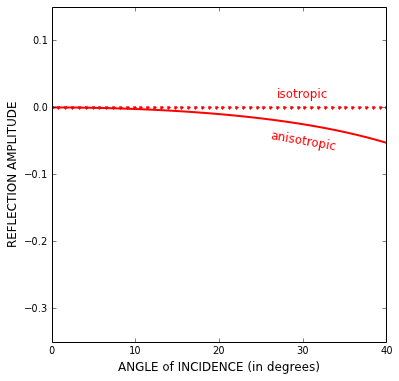

In [32]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(theta, rx[0], 'r.')
ax.plot(theta, rx[1], 'r', lw=2)

ax.set_ylim(-0.35, 0.15)

plt.xlabel('ANGLE of INCIDENCE (in degrees)', size=12)
plt.ylabel('REFLECTION AMPLITUDE', size=12)
plt.xticks(np.arange(0,50,10))

ax.text(30, rx[0][20]+0.014,'isotropic', color='r', size='12', ha='center')
ax.text(30, rx[1][20]-0.04,'anisotropic', color='r', size='12', ha='center', rotation=-10)

plt.show()

## Interactive

In [ ]:
# from IPython.html import widgets

# image = np.copy(horizon)

# def canny_demo(**kwargs):
#     edges = filter.canny(image, **kwargs)
#     plt.figure(figsize=(9,6))
#     plt.imshow(horizon, aspect=0.5, cmap=ch, vmin=vmin, vmax=vmax)
#     plt.imshow(edges, aspect=0.5, cmap='Greys', alpha=0.6)
#     plt.show()
    
# # Add widgets with keyword arguments for `canny`
# widgets.interactive(canny_demo, sigma=8)